# Project One: Multiple Regression, Qualitative Variables Interactions, Quadratic Regression

For Project One, you have been asked to create different regression models analyzing a housing data set. Before beginning work on the project, be sure to read through the Project One Guidelines and Rubric to understand what you need to do and how you will be graded on this assignment. Be sure to carefully review the Project One Summary Report template, which contains all of the questions that you will need to answer about the regression analyses you are performing.

For this project, you will be writing all the scripts yourself. You may reference the textbook and your previous work on the problem sets to help you write the scripts.


### Scenario

You are a data analyst working for a real estate company. You have access to a large set of historical data that you can use to analyze relationships between different attributes of a house (such as square footage or the number of bathrooms) and the house’s selling price. You have been asked to create different regression models to predict sale prices for houses based on critical variable factors. These regression models will help your company set better prices when listing a home for a client. Setting better prices will ensure that listings can be sold within a reasonable amount of time.

There are several variables in this data set, but you will be working with the following important variables: 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> price </div> | <div style="text-align: left"> Sale price of the home </div> |
| <div style="text-align: left"> bedrooms </div> | <div style="text-align: left"> Number of bedrooms </div> |
| <div style="text-align: left"> bathrooms </div> | <div style="text-align: left"> Number of bathrooms </div> |
| <div style="text-align: left"> sqft_living </div> | <div style="text-align: left"> Size of the living area in sqft </div> |
| <div style="text-align: left"> sqft_above </div> | <div style="text-align: left"> Size of the upper level in sqft </div> |
| <div style="text-align: left"> sqft_lot </div> | <div style="text-align: left"> Size of the lot in sqft </div> |
| <div style="text-align: left"> age </div> | <div style="text-align: left"> Age of the home </div> |
| <div style="text-align: left"> grade </div> | <div style="text-align: left"> Measure of craftsmanship and the quality of materials used to build the home </div> |
| <div style="text-align: left"> appliance_age </div> | <div style="text-align: left"> Average age of all appliances in the home </div> |
| <div style="text-align: left"> crime </div> | <div style="text-align: left"> Crime rate per 100,000 people </div> |
| <div style="text-align: left"> backyard </div> | <div style="text-align: left"> Home has a backyard (backyard=1) or not (backyard=0) </div> |
| <div style="text-align: left"> school_rating </div> | <div style="text-align: left"> Average rating of schools in the area </div> |
| <div style="text-align: left"> view </div> | <div style="text-align: left"> Home backs out to a lake (view=2), backs out to trees (view=1), or backs out to a road (view=0) </div> |

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Prepare Your Data Set

In the following code block, you have been given the R code to prepare your data set.

Click the **Run** button on the toolbar to run this code.

In [3]:
housing <- read.csv(file="housing_v2.csv", header=TRUE, sep=",")

# converting appropriate variables to factors  
housing <- within(housing, {
   view <- factor(view)
   backyard <- factor(backyard)
})

# number of columns
ncol(housing)

# number of rows
nrow(housing)

[1] 23

[1] 2692

In [4]:
head(housing)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,backyard,view,condition,⋯,yr_built,yr_renovated,renovated,zipcode,sqft_living15,sqft_lot15,age,appliance_age,crime,school_rating
,<int>,<int>,<int>,<dbl>,<int>,<int>,<dbl>,<fct>,<fct>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>
1,1,325000,3,2.25,1570,43350,1.0,0,2,4,⋯,1967,0,0,98022,1570,220849,48,17.7,138,5.27
2,2,745000,5,3.00,2400,10126,2.0,0,2,3,⋯,1981,0,0,98126,2250,3946,34,3.2,101,9.14
3,3,571000,4,1.00,1350,4000,1.5,0,0,3,⋯,1930,0,0,98117,1520,4000,85,7.6,110,7.97
4,4,395000,2,2.00,1960,4018,1.0,0,0,5,⋯,1950,0,0,98108,1240,4641,65,13.0,118,6.52
5,5,449950,3,1.75,1470,7590,1.0,0,0,3,⋯,1988,0,0,98117,1700,5080,27,6.8,98,8.18
6,6,243000,3,1.75,1450,12125,1.0,0,0,4,⋯,1981,0,0,98001,1210,12125,34,14.1,209,6.23


# Model #1 - First Order Regression Model with Quantitative and Qualitative Variables

You have been asked to create a first order regression model for *price* as the response variable, and *sqft_living*, *sqft_above*, *age*, *bathrooms*, and *view* as predictor variables. Before writing any code, review Section 3 of the Summary Report template to see the questions you will be answering about your first order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

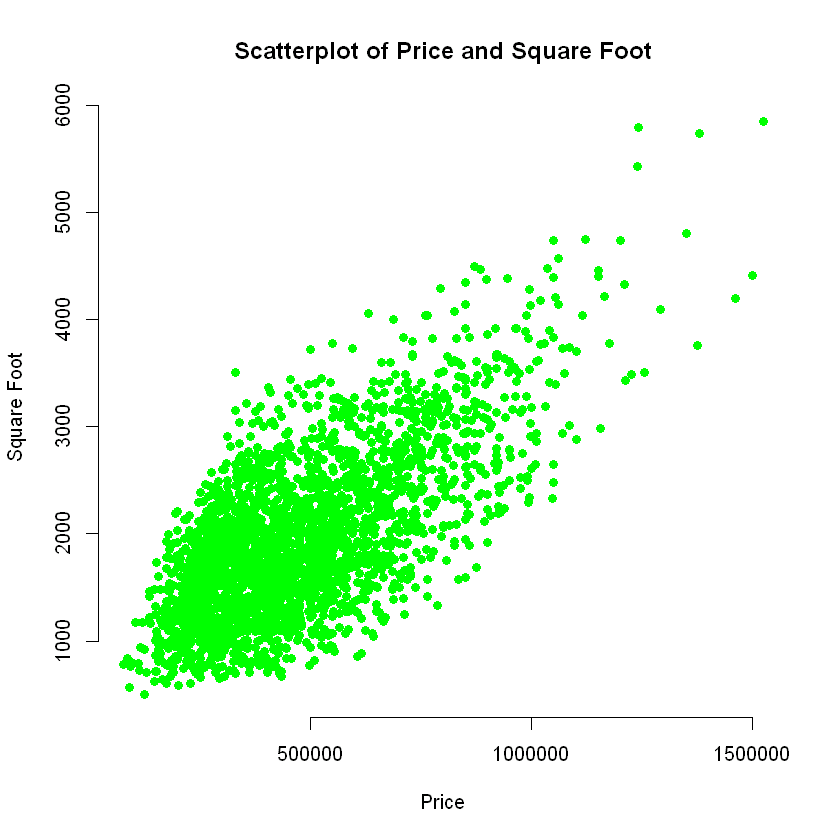

In [11]:
plot(housing$price, housing$sqft_living, 
     main = "Scatterplot of Price and Square Foot",
     xlab = "Price", ylab = "Square Foot",
     col="green", 
     pch = 19, frame = FALSE)

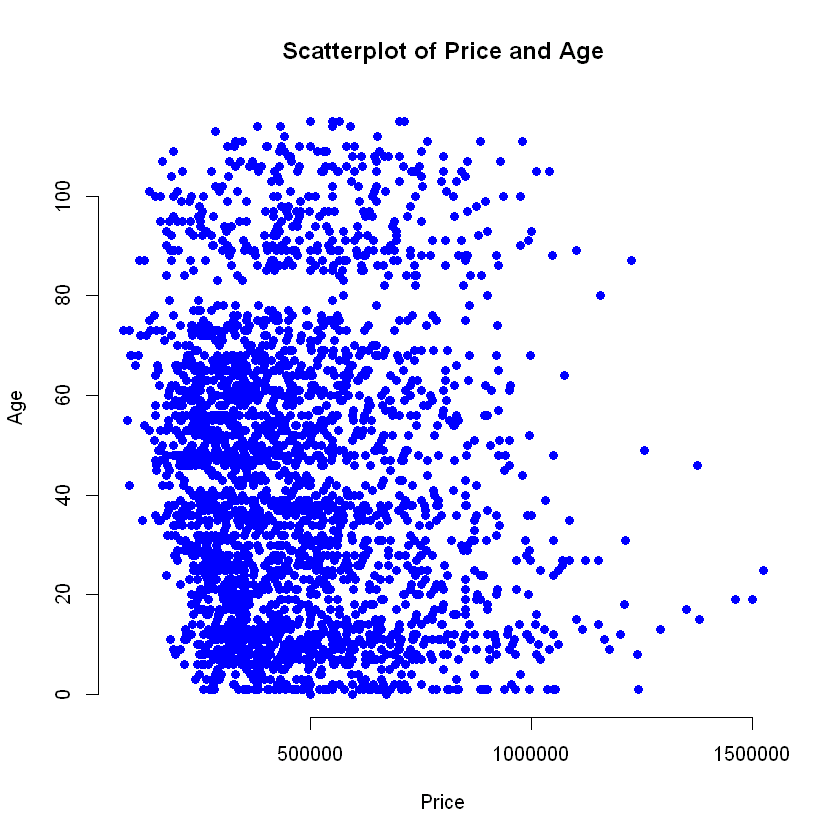

In [12]:
plot(housing$price, housing$age, 
     main = "Scatterplot of Price and Age",
     xlab = "Price", ylab = "Age",
     col="blue", 
     pch = 19, frame = FALSE)

In [9]:
myvars1 <- c("price","sqft_living")
hous_subset1 <- housing[myvars1]

print("cor")
corr_matrix <- cor(hous_subset1, method = "pearson")
round(corr_matrix, 4)

[1] "cor"


,price,sqft_living
price,1.0000,0.6895
sqft_living,0.6895,1.0000


In [10]:

myvars2 <- c("price","age")
hous_subset2 <- housing[myvars2]

print("cor")
corr_matrix <- cor(hous_subset2, method = "pearson")
round(corr_matrix, 4)

[1] "cor"


,price,age
price,1.0000,-0.0746
age,-0.0746,1.0000


In [23]:
model1 <- lm(price ~ sqft_living + sqft_above + age + bathrooms + view, data=housing)
summary(model1)


Call:
lm(formula = price ~ sqft_living + sqft_above + age + bathrooms + 
    view, data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-419299 -101792   -5606   93896  489323 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.709e+03  1.411e+04   0.546  0.58495    
sqft_living 1.293e+02  8.123e+00  15.916  < 2e-16 ***
sqft_above  1.951e+01  7.458e+00   2.616  0.00894 ** 
age         1.451e+03  1.199e+02  12.098  < 2e-16 ***
bathrooms   4.397e+04  6.126e+03   7.178 9.13e-13 ***
view1       1.675e+05  1.071e+04  15.640  < 2e-16 ***
view2       2.490e+05  1.201e+04  20.739  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 133600 on 2685 degrees of freedom
Multiple R-squared:  0.6029,	Adjusted R-squared:  0.602 
F-statistic: 679.3 on 6 and 2685 DF,  p-value: < 2.2e-16


In [37]:
print("fitted")
fitted_values <- fitted.values(model1) 
head(fitted_values)

[1] "fitted"


1        2        3        4        5        6 
658920.0 795090.2 375857.1 462459.0 342554.5 349732.9

In [38]:
print("residuals")
residuals <- residuals(model1) 
head(residuals)

[1] "residuals"


1          2          3          4          5          6 
-333919.97  -50090.15  195142.94  -67458.99  107395.51 -106732.87

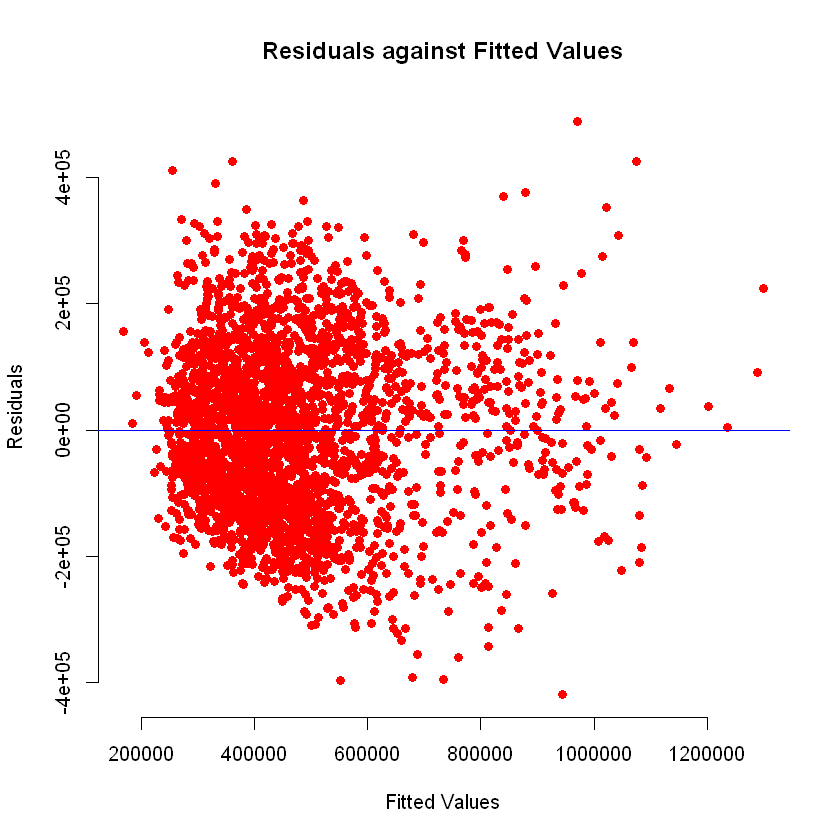

In [39]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="red", 
     pch = 19, frame = FALSE)
abline(h = 0, col = "blue") 

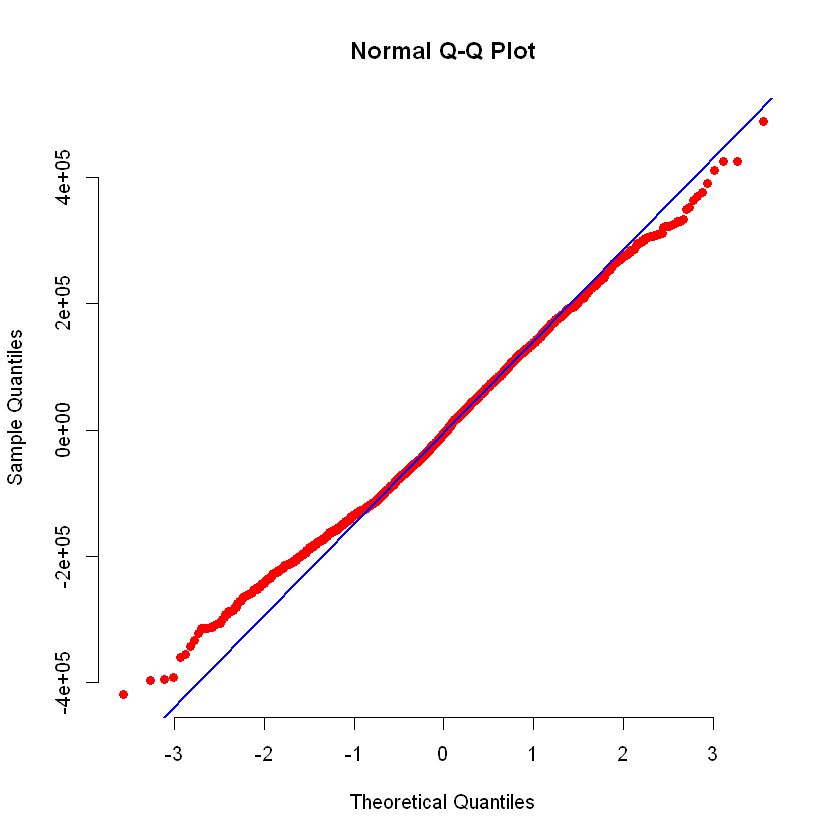

In [40]:
qqnorm(residuals, pch = 19, col="red", frame = FALSE)
qqline(residuals, col = "blue", lwd = 2)

In [41]:
print("confint")
conf_95_int <- confint(model1, level=0.90) 
round(conf_95_int, 4)

[1] "confint"


,5 %,95 %
(Intercept),-15513.0058,30931.1022
sqft_living,115.9193,142.6499
sqft_above,7.2402,31.7839
age,1253.3171,1647.9160
bathrooms,33890.4136,54049.8359
view1,149870.7002,185112.3814
view2,229279.0983,268796.5052


In [25]:
newdata <- data.frame(sqft_living=2150, sqft_above=1050, age=15, bathrooms=3, view='0')

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


,fit,lwr,upr
1,459828.2,239563,680093.4


[1] "confidence interval"


,fit,lwr,upr
1,459828.2,446087.9,473568.5


In [26]:
newdata <- data.frame(sqft_living=4250, sqft_above=2100, age=5, bathrooms=5, view='2')

print("prediction interval")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


,fit,lwr,upr
1,1074285,852522.6,1296048


[1] "confidence interval"


,fit,lwr,upr
1,1074285,1045117,1103454


# Model #2 - Complete Second Order Regression Model with Quantitative Variables

You have been asked to create a complete second order regression model for *price* as the response variable, and *school_rating* and *crime* as predictor variables. Before writing any code, review Section 4 of the Summary Report template to see the questions you will be answering about your complete second order multiple regression model.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

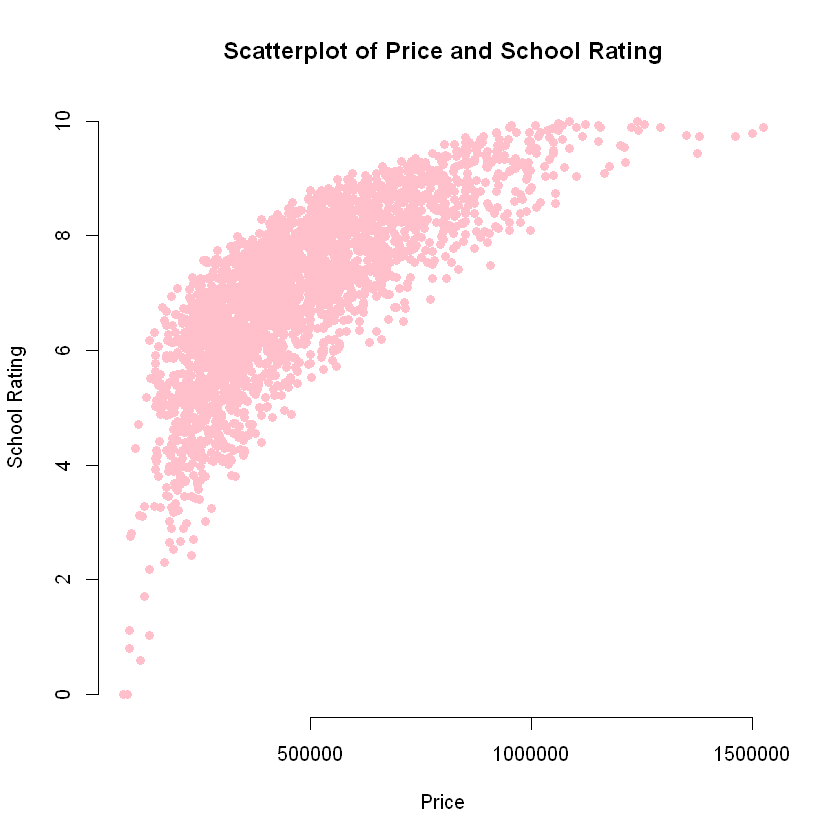

In [13]:
plot(housing$price, housing$school_rating, 
     main = "Scatterplot of Price and School Rating",
     xlab = "Price", ylab = "School Rating",
     col="pink", 
     pch = 19, frame = FALSE)

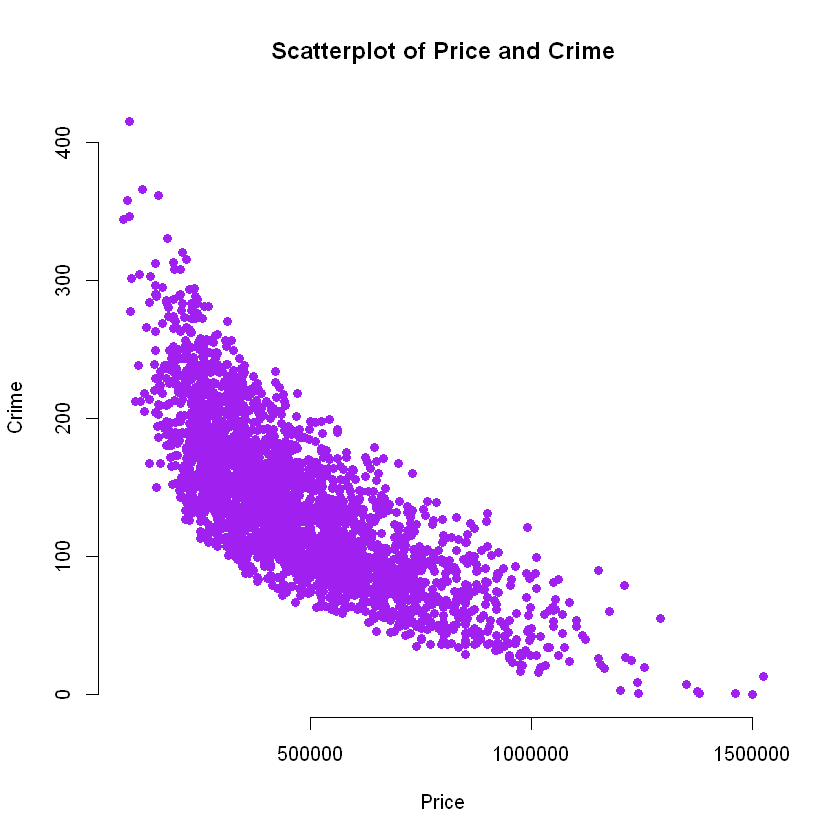

In [17]:
plot(housing$price, housing$crime, 
     main = "Scatterplot of Price and Crime",
     xlab = "Price", ylab = "Crime",
     col="purple", 
     pch = 19, frame = FALSE)

In [42]:
model2 <- lm(price ~ school_rating + crime + school_rating:crime + I(school_rating^2) + I(crime^2) , data=housing)
summary(model2)


Call:
lm(formula = price ~ school_rating + crime + school_rating:crime + 
    I(school_rating^2) + I(crime^2), data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-340729  -61055   -6288   56875  427915 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          7.339e+05  1.032e+05   7.113 1.45e-12 ***
school_rating       -7.375e+04  2.083e+04  -3.541 0.000406 ***
crime               -3.155e+03  5.235e+02  -6.027 1.90e-09 ***
I(school_rating^2)   1.165e+04  1.109e+03  10.497  < 2e-16 ***
I(crime^2)           6.377e+00  7.265e-01   8.777  < 2e-16 ***
school_rating:crime -5.227e+01  4.853e+01  -1.077 0.281513    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 92690 on 2686 degrees of freedom
Multiple R-squared:  0.8088,	Adjusted R-squared:  0.8084 
F-statistic:  2272 on 5 and 2686 DF,  p-value: < 2.2e-16


In [47]:
print("fitted")
fitted_values <- fitted.values(model2) 
head(fitted_values)

[1] "fitted"


1        2        3        4        5        6 
316795.9 730990.2 570266.2 424500.0 620142.7 277655.2

In [48]:
print("residuals")
residuals <- residuals(model2)
head(residuals)

[1] "residuals"


1            2            3            4            5            6 
   8204.1296   14009.7509     733.8316  -29499.9635 -170192.7151  -34655.2039

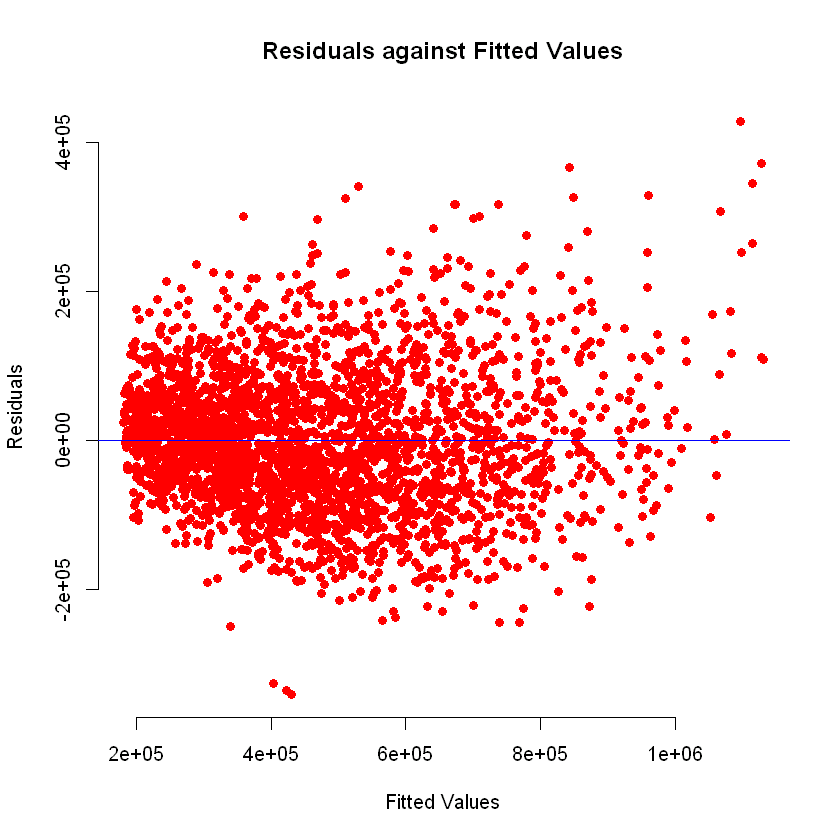

In [49]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="red", 
     pch = 19, frame = FALSE)
abline(h = 0, col = "blue") 

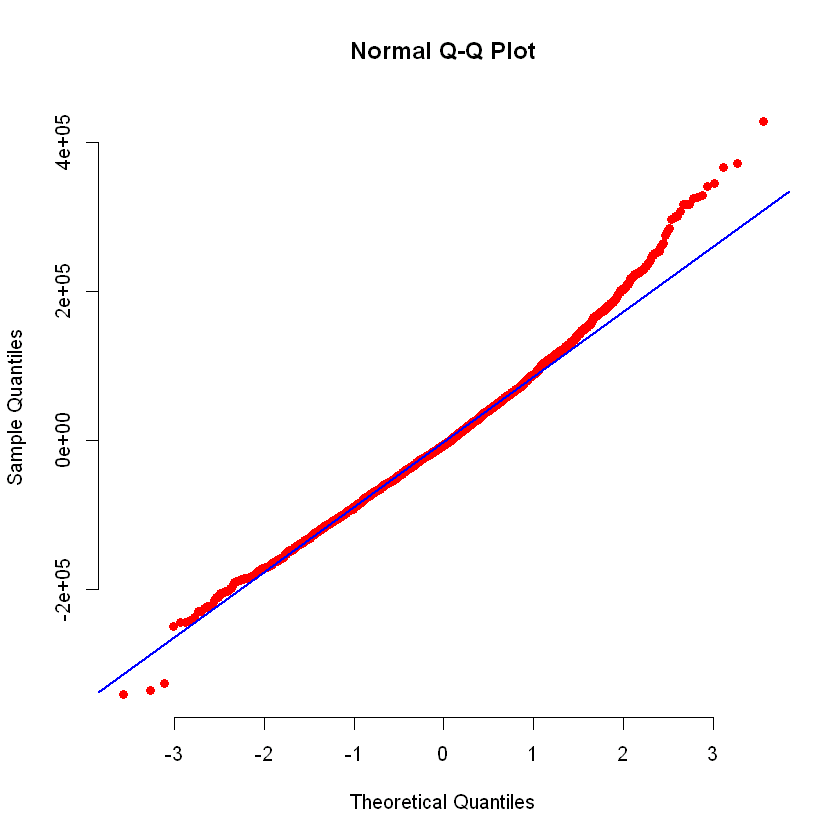

In [50]:
qqnorm(residuals, pch = 19, col="red", frame = FALSE)
qqline(residuals, col = "blue", lwd = 2)

In [46]:
# confidence intervals for model parameters
print("confint")
conf_95_int <- confint(model2, level=0.90) 
round(conf_95_int, 4)

[1] "confint"


,5 %,95 %
(Intercept),564127.8529,903693.6158
school_rating,-108021.8320,-39474.5138
crime,-4016.0800,-2293.4529
I(school_rating^2),9821.2268,13472.3788
I(crime^2),5.1816,7.5724
school_rating:crime,-132.1146,27.5761


In [45]:
newdata <- data.frame(school_rating=9.80, crime=81.02)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


,fit,lwr,upr
1,874497,721606.2,1027388


[1] "confidence interval"


,fit,lwr,upr
1,874497,863681.4,885312.7


In [44]:
newdata <- data.frame(school_rating=4.28, crime=215.50)

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int,4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int,4)

[1] "prediction interval"


,fit,lwr,upr
1,199706.7,46991.65,352421.7


[1] "confidence interval"


,fit,lwr,upr
1,199706.7,191753.5,207659.9


# Nested Models F-Test

You have been asked to create a reduced model and compare it with the complete second order model (Model #2 above). Before writing any code, review Section 5 of the Summary Report template to see the questions you will need to answer.

Run your scripts to get the outputs of your regression analysis. Then use the outputs to answer the questions in your summary report.

**Note: Use the + (plus) button to add new code blocks, if needed.**

In [5]:
model3 <- lm(price ~ school_rating + crime + crime:school_rating, data=housing)
summary(model3)


Call:
lm(formula = price ~ school_rating + crime + crime:school_rating, 
    data = housing)

Residuals:
    Min      1Q  Median      3Q     Max 
-336984  -63754   -4397   58894  440377 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)         -410233.37   25261.25  -16.24   <2e-16 ***
school_rating        155559.97    3133.06   49.65   <2e-16 ***
crime                  2230.07     129.70   17.20   <2e-16 ***
school_rating:crime    -564.85      17.86  -31.63   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 94870 on 2688 degrees of freedom
Multiple R-squared:  0.7995,	Adjusted R-squared:  0.7993 
F-statistic:  3573 on 3 and 2688 DF,  p-value: < 2.2e-16


In [6]:
# confidence intervals for model parameters
print("confint")
conf_95_int <- confint(model3, level=0.90) 
round(conf_95_int, 3)

[1] "confint"


,5 %,95 %
(Intercept),-451798.765,-368667.983
school_rating,150404.774,160715.161
crime,2016.670,2443.479
school_rating:crime,-594.228,-535.464


In [10]:
# Create the complete model
fit_complete <- lm(price ~ school_rating + crime + school_rating:crime + I(school_rating^2) + I(crime^2), data=housing)

# Create the reduced model
fit_reduced <- lm(price ~ school_rating + crime + school_rating:crime, data=housing)

# Perform the F-test
anova(fit_complete, fit_reduced)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2686,2.307469e+13,NA,NA,NA,NA
2,2688,2.419501e+13,-2,-1.120319e+12,65.20513,2.22716e-28


## End of Project One Jupyter Notebook
The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in the Summary Report template for Project One, and to include your completed Jupyter Notebook scripts as part of your submission.